# Data analysis

## Installing and importing modules

In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***
***

## Read and Review the dataset

### Read csv file

In [3]:
print(os.path.exists("variant_1.csv"))

True


In [4]:
ds = pd.read_csv("variant_1.csv")

In [5]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [6]:
print('Samples count: ', ds.shape[0])

Samples count:  148670


In [7]:
display(ds.head(5))

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


### Chek missing data

In [8]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [9]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [10]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


### Unique values count

In [11]:
ds.nunique()

Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

### Distribution statistics

In [12]:
ds.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


### Values type descriptions

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

## Different types of diagrams

Percentage of defaults

In [14]:
default = ds[ds['Status'] == 1].shape[0]  
not_default = ds[ds['Status'] == 0].shape[0] 
print("Total default: {}".format(default))

Total default: 36639


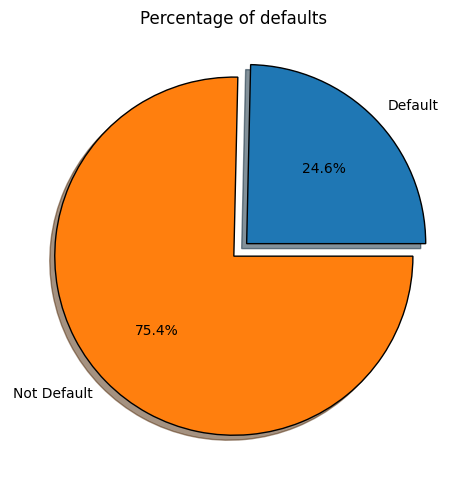

In [15]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[default, not_default]
labels=['Default','Not Default']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of defaults")
plt.tight_layout()
plt.show()

Сorrelation matrix

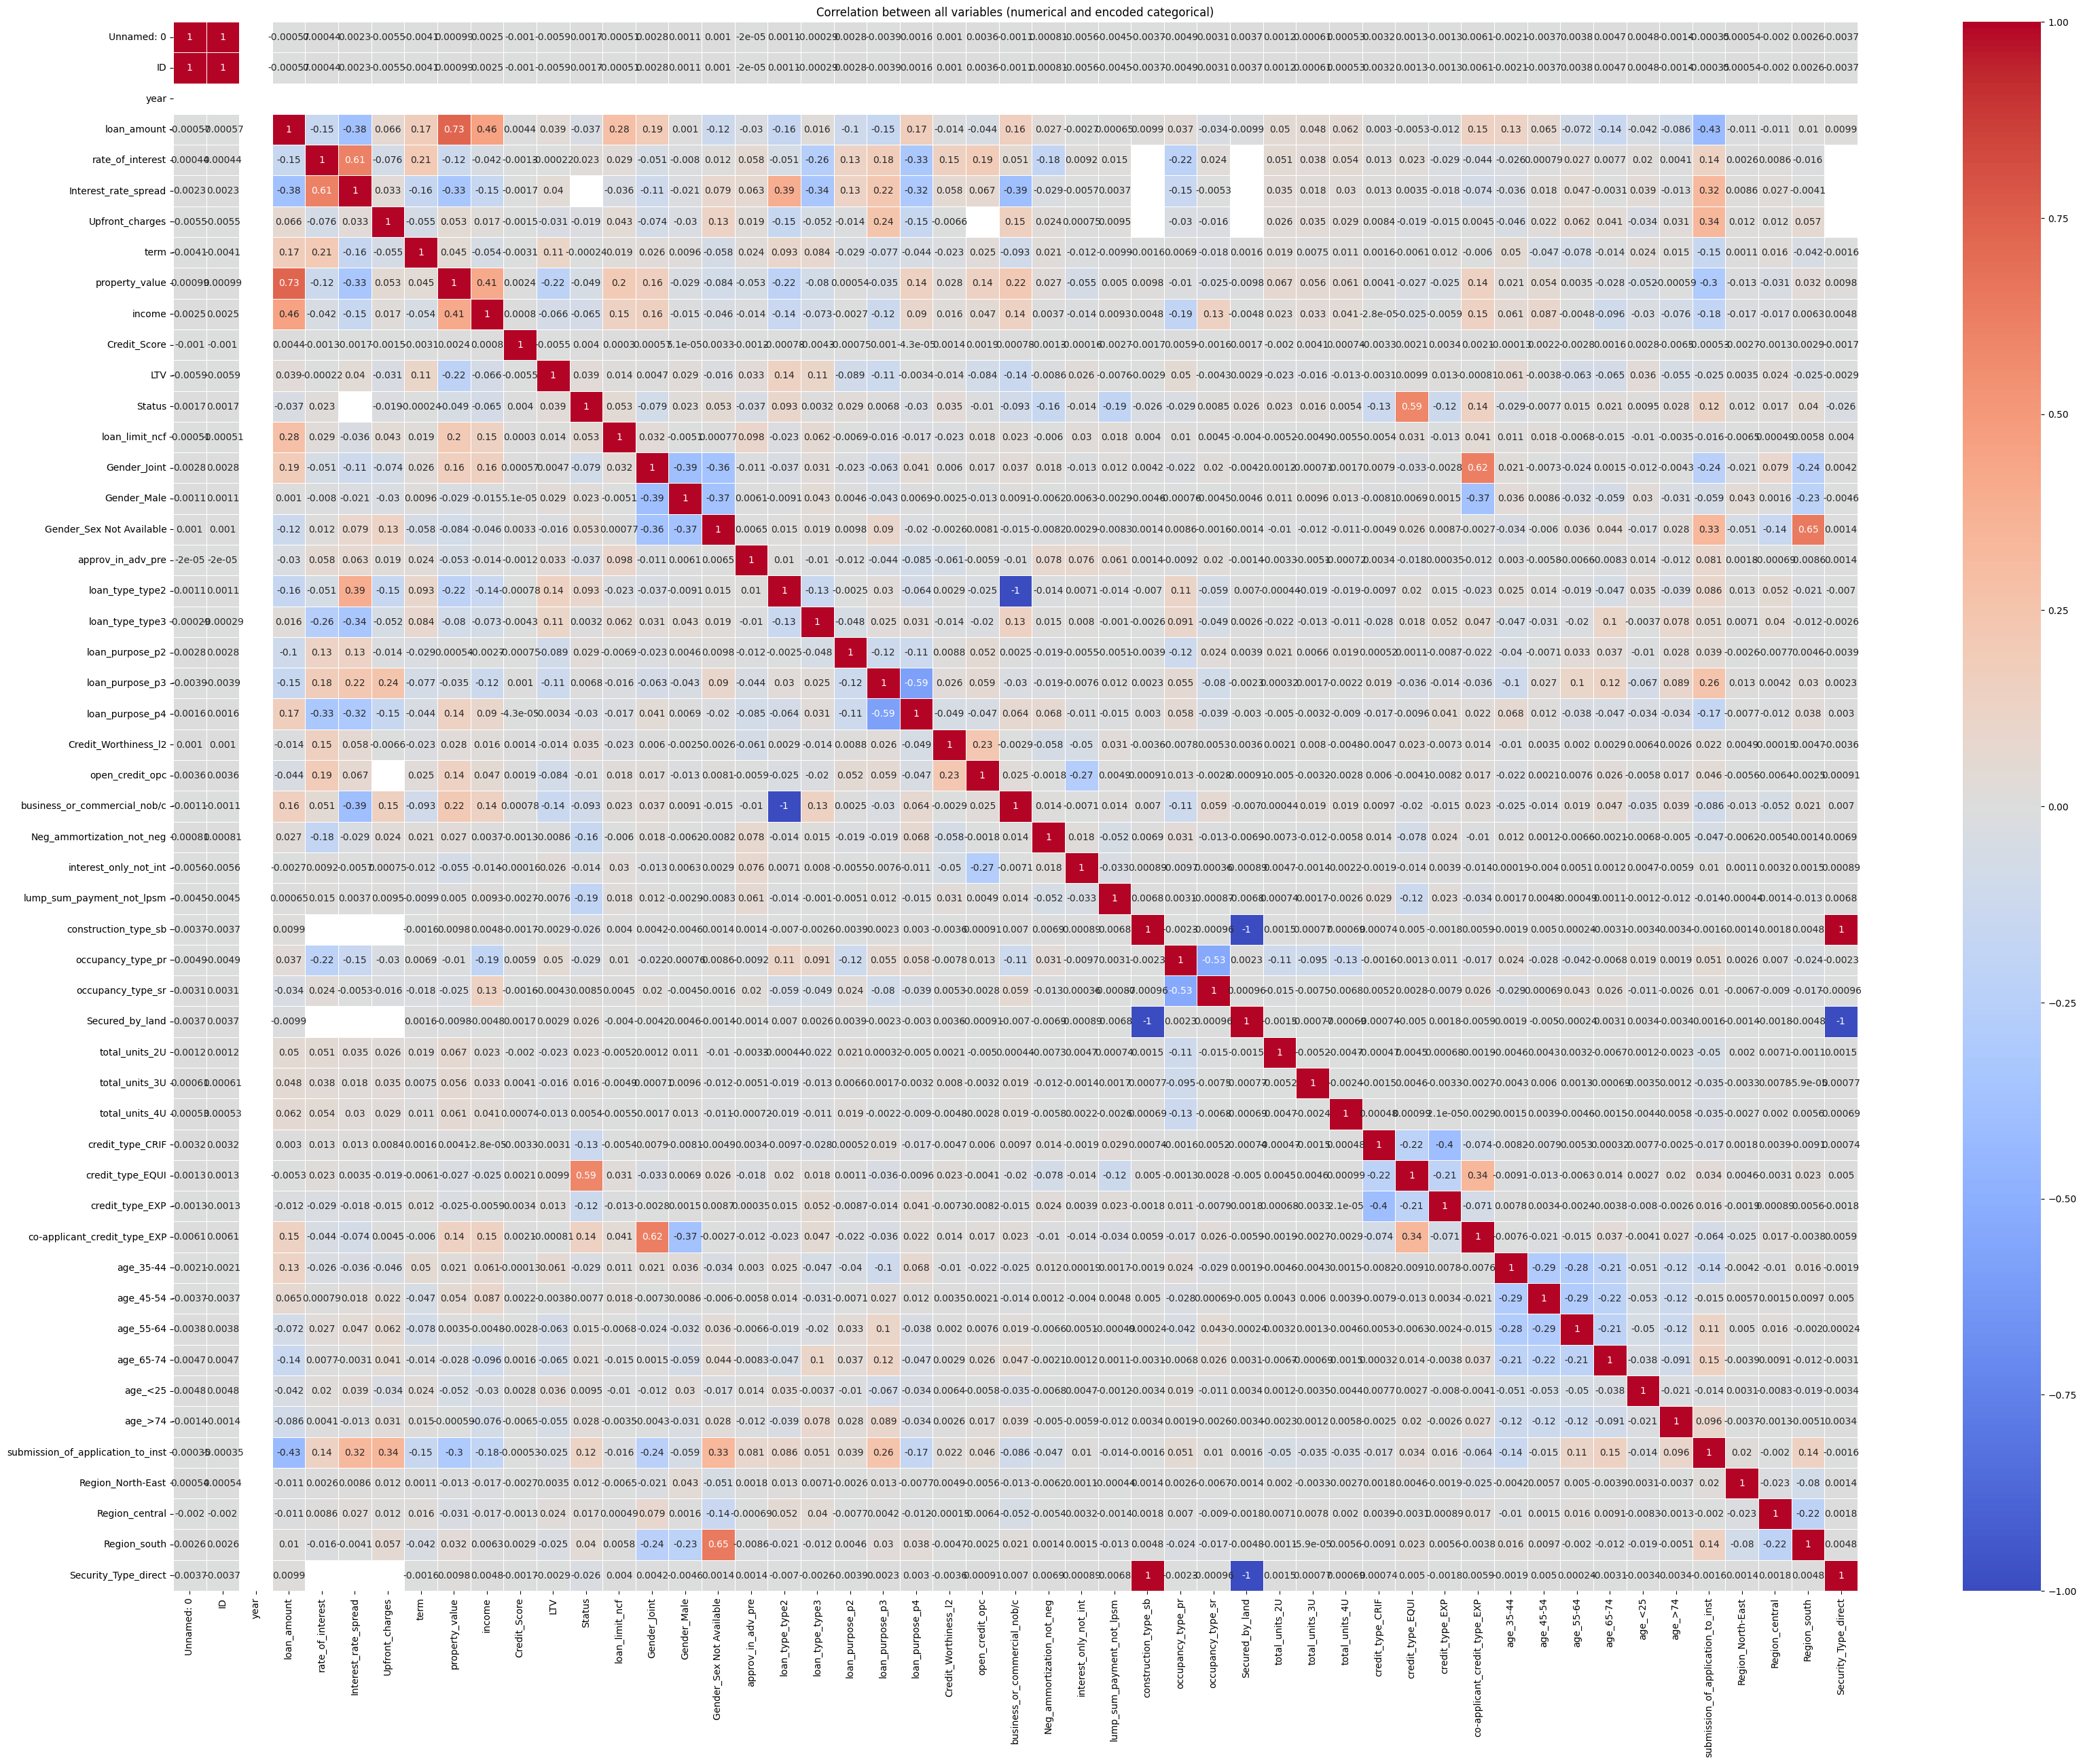

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(ds, drop_first=True)

# Calculate correlation matrix for all variables
correlation_matrix = encoded_data.corr()

# Plot heatmap with correlation matrix values
plt.figure(figsize=(40, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between all variables (numerical and encoded categorical)')
plt.show()


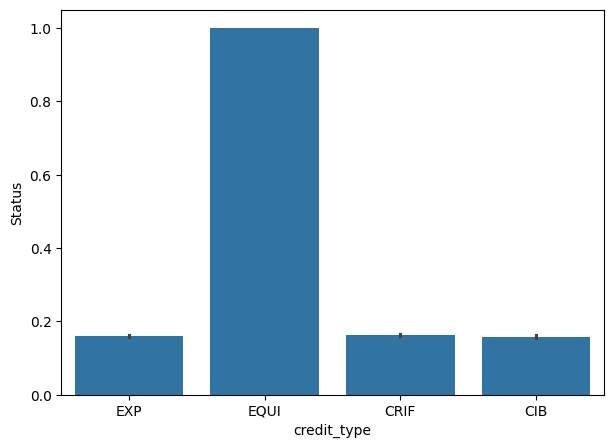

In [17]:
graph = ds[["credit_type", "Status"]]
ax = sns.barplot(x="credit_type", y="Status", data=graph)

All individuals with an EQUI loan type have a default status.

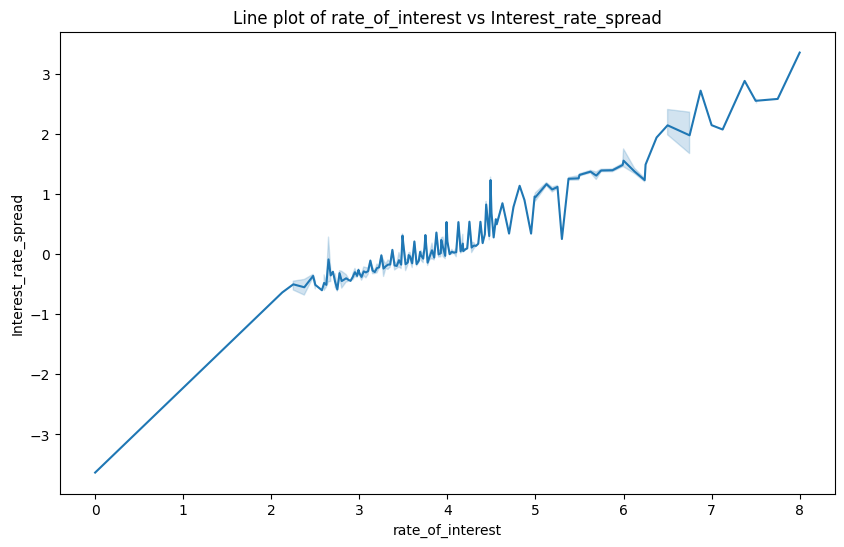

In [18]:
# Line plot
graph = ds[["rate_of_interest", "Interest_rate_spread"]]
plt.figure(figsize=(10, 6))
sns.lineplot(x="rate_of_interest", y="Interest_rate_spread", data=graph)
plt.title('Line plot of rate_of_interest vs Interest_rate_spread')
plt.xlabel('rate_of_interest')
plt.ylabel('Interest_rate_spread')
plt.show()

As the rate_of_interest increases, the Interest_rate_spread also increases.

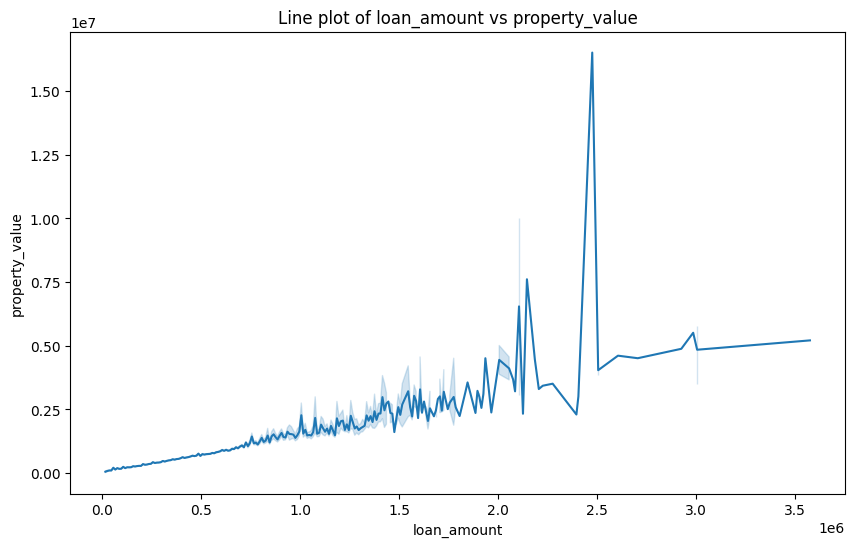

In [19]:
# Line plot
graph = ds[["loan_amount", "property_value"]]
plt.figure(figsize=(10, 6))
sns.lineplot(x="loan_amount", y="property_value", data=graph)
plt.title('Line plot of loan_amount vs property_value')
plt.xlabel('loan_amount')
plt.ylabel('property_value')
plt.show()

As the property_value increases, the loan_amount also increases.

C:\Users\user\AppData\Local\Temp\ipykernel_19316\4171628970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph['income'] = pd.cut(graph['income'], bins=bins, labels=labels, right=False)


(0.0, 1.0)

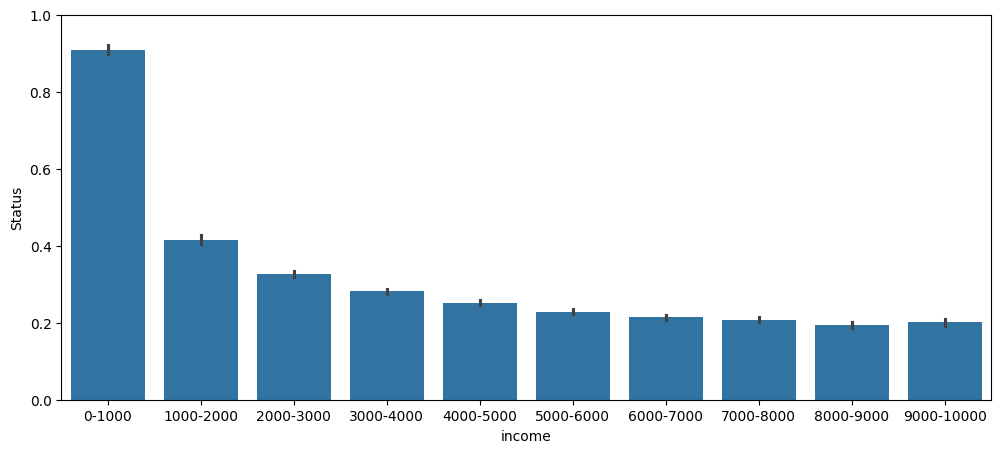

In [20]:
graph = ds[["income", "Status"]]
bins = range(0, 10001, 1000)
labels = [f"{b}-{b+1000}" for b in bins[:-1]]
graph['income'] = pd.cut(graph['income'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="income", y="Status", data=graph, estimator='mean')
plt.ylim(0, 1)

(0.0, 1.0)

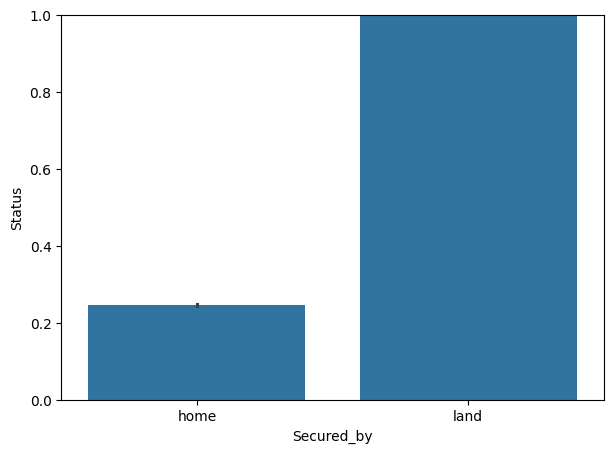

In [21]:
graph = ds[["Secured_by", "Status"]]
ax = sns.barplot(x="Secured_by", y="Status", data=graph)
plt.ylim(0, 1)

All individuals whose loans are secured by land have a default status.